In [1]:
__author__ = 'Brandon Matthews <brandonmatthews@my.unt.edu>, Ohad Shemmer <ohad.shemmer@unt.edu>, Cooper Dix <cooperdix@my.unt.edu>'
__version__ = '20230206' # yyyymmdd
__datasets__ = ['gnirs_dqs']
__keywords__ = ['gemini llp','tap','file service','spectra', 'quasars'], # keywords relevant to this notebook, e.g. ['science case','dwarf galaxies'] Use only keywords from the master list: https://github.com/astro-datalab/notebooks-latest/blob/master/keywords.txt

# The Gemini Near Infrared Spectrograph - Distant Quasar Survey (GNIRS-DQS)

*Brandon Matthews, Ohad Shemmer, Cooper Dix, & The GNIRS-DQS Collaboration*

### Table of contents
* [Goals & notebook summary](#goals)
* [Disclaimer & attribution](#attribution)
* [Imports & setup](#import)
* [Authentication](#auth)
* [Accessing GNIRS-DQS data files](#access)
* [Read in the tables](#tables)
* [Example plots](#exampleplots)
* [Acknowledgements](#acks)
* [Resources and references](#resources)

<a class="anchor" id="goals"></a>
# Goals
The GNIRS-DQS spectral inventory is utilized primarily to develop prescriptions for obtaining more accurate and precise redshifts, black hole masses, and accretion rates for all quasars. Additionally, the measurements facilitate an understanding of the dependence of rest-frame ultraviolet-optical spectral properties of quasars on redshift, luminosity, and Eddington ratio, and test whether the physical properties of the quasar central engine evolve over cosmic time.

This notebook shows:
- How to access GNIRS-DQS data from Data Lab
- The available tables and columns from GNIRS-DQS
- Example plots and example spectra from GNIRS-DQS

# Summary
We present spectroscopic measurements for 260 sources from the Gemini Near Infrared Spectrograph - Distant Quasar Survey (GNIRS-DQS). Being the largest uniform, homogeneous survey of its kind, it represents a flux-limited sample (≲19.0 mag, ≲16.5 mag) of Sloan Digital Sky Survey (SDSS) quasars at 1.5 < z < 3.5 with a monochromatic luminosity (λLλ) at 5100Å in the range of $10^{44}-10^{46}$ $\rm{erg}~ \rm{s}^{-1}$. A combination of the GNIRS and SDSS spectra covers principal quasar diagnostic features, chiefly the C IV λ1549, Mg II λ2798, λ2803, Hβ λ4861, and [O III] λ4959, λ5007 emission lines, in each source.

These data files contain four tables:

1.) Column Headings for Spectral Measurements (`gnirs_dqs.spec_measurements`)

2.) Column Headings for Supplemental Emission-Line Measurements (`gnirs_dqs.spec_measurements_supp`), when available

3.) Column Headings for Gaussian Parameters of Emission-Line Profiles (`gnirs_dqs.gaussian_fit_parameters`)

4.) Observation Log of GNIRS-DQS Objects (`gnirs_dqs.obs_log`)
      
More information about each table can be found below in the "Read in the tables" section with their correpsonding table.

<a class="anchor" id="attribution"></a>
# Disclaimer & attribution

* Data Lab concept paper: Fitzpatrick et al., "The NOAO Data Laboratory: a conceptual overview", SPIE, 9149, 2014, http://dx.doi.org/10.1117/12.2057445

* Data Lab disclaimer: https://datalab.noirlab.edu/disclaimers.php

<a class="anchor" id="import"></a>
# Imports and setup

In [16]:
# std lib
from getpass import getpass

# 3rd party # remove imports that are not needed
import numpy as np
import pylab as plt
import pandas as pd
import matplotlib.pyplot as plt

# Data Lab
from dl import queryClient as qc, storeClient as sc, authClient as ac
from dl.helpers.utils import convert

#Plotting
plt.rcParams['figure.figsize'] = (10,7)
plt.rcParams['font.size'] = 16

<a class="anchor" id="auth"></a>
# Authentication

Much of the functionality of Data Lab can be accessed without explicitly logging in (the service then uses an anonymous login). But some capacities, for instance saving the results of your queries to your virtual storage space, require a login (i.e. you will need a registered user account).

If you need to log in to Data Lab, issue this command, and respond according to the instructions:

In [3]:
#ac.login(input("Enter user name: (+ENTER) "),getpass("Enter password: (+ENTER) "))
ac.whoAmI()

'demo00'

<a class="anchor" id="access"></a>
# Accessing GNIRS-DQS Data Files

All GNIRS-DQS data products, in their original form, reside at Data Lab in a public VOSpacefile service. Examination of the file service and its contents utilizes the Data Lab storeClient (imported as `sc`):

In [4]:
print(sc.services('gnirs_dqs'))


                    name   svc   description
                --------   ----  --------
               gnirs_dqs   vos   Gemini Near-IR Spectroscopic-Distant Qua ...



The `storeClient.ls()` method lists the contents of the top-level directory. This will list all 260 GNIRS DQS ASCII spectral files available in the file service:

In [5]:
print(sc.ls('gnirs_dqs://',format='long'))

-rw-rw-r-x  gnirs_dqs  1110004  13 Jul 2022 08:32  001018.88+280932.5.txt
-rw-rw-r-x  gnirs_dqs  688348  13 Jul 2022 08:32  001249.89+285552.6.txt
-rw-rw-r-x  gnirs_dqs  679362  13 Jul 2022 08:32  001355.10-012304.0.txt
-rw-rw-r-x  gnirs_dqs  739027  13 Jul 2022 08:32  001453.20+091217.6.txt
-rw-rw-r-x  gnirs_dqs  1206255  13 Jul 2022 08:32  001813.30+361058.6.txt
-rw-rw-r-x  gnirs_dqs  1340447  13 Jul 2022 08:32  001914.46+155555.9.txt
-rw-rw-r-x  gnirs_dqs  1328127  13 Jul 2022 08:32  002634.46+274015.5.txt
-rw-rw-r-x  gnirs_dqs  820289  13 Jul 2022 08:32  003001.11-015743.5.txt
-rw-rw-r-x  gnirs_dqs  1141019  13 Jul 2022 08:32  003416.61+002241.1.txt
-rw-rw-r-x  gnirs_dqs  749562  13 Jul 2022 08:32  003853.15+333044.3.txt
-rw-rw-r-x  gnirs_dqs  737158  13 Jul 2022 08:32  004613.54+010425.7.txt
-rw-rw-r-x  gnirs_dqs  767293  13 Jul 2022 08:32  004710.48+163106.5.txt
-rw-rw-r-x  gnirs_dqs  936025  13 Jul 2022 08:32  004719.71+014813.9.txt
-rw-rw-r-x  gnirs_dqs  1019006  13 Jul 2022 08

Loading the data from a particular file from the GNIRS-DQS file service, and converting to Pandas dataframe:

In [6]:
data = convert(sc.get(fr = 'gnirs_dqs://001914.46+155555.9.txt',to = ''),'pandas')
data

,wavelength,flux,Mg2_fit,Mg2_continuum,Fe3_fit,Mg2_gauss1,Mg2_gauss2,O2_fit,O2_continuum,O2_gauss1,...,Hb_gauss1,Hb_gauss2,Ha_fit,Ha_continuum,Ha_gauss1,Ha_gauss2,O3_4959_gauss1,O3_4959_gauss2,O3_5007_gauss1,O3_5007_gauss2
0,7266.0,1.009100e-16,2.254300e-16,2.254300e-16,0.000000e+00,1.574300e-27,1.574300e-27,0,0,0,...,1.574300e-27,1.574300e-27,5.616800e-17,5.616800e-17,1.574300e-27,1.574300e-27,1.574300e-27,1.574300e-27,1.574300e-27,1.574300e-27
1,7272.5,1.009100e-16,2.253100e-16,2.253100e-16,0.000000e+00,1.574300e-27,1.574300e-27,0,0,0,...,1.574300e-27,1.574300e-27,5.615900e-17,5.615900e-17,1.574300e-27,1.574300e-27,1.574300e-27,1.574300e-27,1.574300e-27,1.574300e-27
2,7782.2,2.174100e-16,2.138600e-16,2.064900e-16,7.362600e-18,1.574300e-27,1.574300e-27,0,0,0,...,1.574300e-27,1.574300e-27,5.485100e-17,5.485100e-17,1.574300e-27,1.574300e-27,1.574300e-27,1.574300e-27,1.574300e-27,1.574300e-27
3,7801.8,2.487400e-17,2.130800e-16,2.056500e-16,7.434700e-18,1.574300e-27,1.574300e-27,0,0,0,...,1.574300e-27,1.574300e-27,5.479300e-17,5.479300e-17,1.574300e-27,1.574300e-27,1.574300e-27,1.574300e-27,1.574300e-27,1.574300e-27
4,7805.1,2.487400e-17,2.129300e-16,2.055300e-16,7.402100e-18,1.574300e-27,1.574300e-27,0,0,0,...,1.574300e-27,1.574300e-27,5.478400e-17,5.478400e-17,1.574300e-27,1.574300e-27,1.574300e-27,1.574300e-27,1.574300e-27,1.574300e-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3923,25255.0,1.133500e-17,-4.376200e-16,-4.376200e-16,0.000000e+00,1.574300e-27,1.574300e-27,0,0,0,...,1.574300e-27,1.574300e-27,1.007000e-17,1.007000e-17,1.574300e-27,1.574300e-27,1.574300e-27,1.574300e-27,1.574300e-27,1.574300e-27
3924,25261.0,1.432600e-17,-4.378600e-16,-4.378600e-16,0.000000e+00,1.574300e-27,1.574300e-27,0,0,0,...,1.574300e-27,1.574300e-27,1.005300e-17,1.005300e-17,1.574300e-27,1.574300e-27,1.574300e-27,1.574300e-27,1.574300e-27,1.574300e-27
3925,25268.0,1.432600e-17,-4.381000e-16,-4.381000e-16,0.000000e+00,1.574300e-27,1.574300e-27,0,0,0,...,1.574300e-27,1.574300e-27,1.003600e-17,1.003600e-17,1.574300e-27,1.574300e-27,1.574300e-27,1.574300e-27,1.574300e-27,1.574300e-27
3926,25274.0,1.322400e-17,-4.383400e-16,-4.383400e-16,0.000000e+00,1.574300e-27,1.574300e-27,0,0,0,...,1.574300e-27,1.574300e-27,1.001900e-17,1.001900e-17,1.574300e-27,1.574300e-27,1.574300e-27,1.574300e-27,1.574300e-27,1.574300e-27


<a class="anchor" id="tables"></a>
# Read in the tables

All four catalogues (as well as 5 crossmatch tables) are loaded in the Data Lab TAP service as queryable tables. You can interact with the tables using the Data Lab queryClient (imported as qc). Here, let's list some information about the database (also called "schema"):

In [7]:
print(qc.schema('gnirs_dqs'))


Schema: gnirs_dqs

      Table Name   Description
      ----------   -----------
gaussian_fit_parameters   Gaussian parameters of emission-line profiles
         obs_log   Observation log
spec_measurements   Spectral measurements
spec_measurements_supp   Supplementary spectral measurements
x1p5__spec_measurements__allwise__source   gnirs_dqs.spec_measurements and xmatch_std.allwise__source
                   crossmatch (1.5 arcsec)
x1p5__spec_measurements__gaia_dr3__gaia_source   gnirs_dqs.spec_measurements and gaia_dr3.gaia_source cross
                   match (1.5 arcsec)
x1p5__spec_measurements__nsc_dr2__object   gnirs_dqs.spec_measurements and xmatch_std.nsc_dr2__object
                   crossmatch (1.5 arcsec)
x1p5__spec_measurements__sdss_dr17__specobj   gnirs_dqs.spec_measurements and sdss_dr17.specobj crossmat
                   ch (1.5 arcsec)
x1p5__spec_measurements__unwise_dr1__object   gnirs_dqs.spec_measurements and xmatch_std.unwise_dr1__obj
                   ect cros

More information about each table:

In [8]:
for table in ('spec_measurements','spec_measurements_supp','gaussian_fit_parameters','obs_log'):
    print(qc.schema('gnirs_dqs.%s' % table))


Schema: gnirs_dqs
 Table: spec_measurements

     Column Name   Description
     -----------   -----------
          as_mg2   Asymmetry of Mg II double Gaussian fit profile
           as_hb   Asymmetry of Hbeta double Gaussian fit profile
           as_o3   Asymmetry of O III 5007A double Gaussian fit profile
           as_ha   Asymmetry of Halpha double Gaussian fit profile
            zsys   Systemic redshift
        kurt_mg2   Kurtosis of Mg II double Gaussian fit profile
         kurt_hb   Kurtosis of Hbeta double Gaussian fit profile
           ew_o3   Rest-frame O III 5007A emission line equivalent width
       upp_ew_o3   Upper uncertainty in EW_O3
       low_ew_o3   Lower uncertainty in EW_O3
         kurt_o3   Kurtosis of O III 5007A double Gaussian fit profile
         kurt_ha   Kurtosis of Halpha double Gaussian fit profile
          ew_fe2   Rest-frame Fe II emission line equivalent width
      upp_ew_fe2   Upper uncertainty of EW of Fe II
      low_ew_fe2   Lower uncertai

Each table can be queried using either SQL (Postgres flavor) or ADQL. For the purpose of this notebook we will query and load the entire tables. The Data Lab queryClient query method can convert the query result to various formats on the fly, e.g. to a Pandas data frame, shown with each table below.

#### The `spec_measurements` table:

Column Headings for Spectral Measurements (`gnirs_dqs.spec_measurements`).

    a.) Line center (lc) measurements are based on the emission line peak of the peak-fit value.
    b.) Asymmetry (as) is defined here as the skewness of the Gaussian fits, i.e., a measure of the asymmetry of the distribution about its mean, s = E(x − μ)^3/σ^3, where μ is the mean of x, σ is the standard deviation of x, and E(t) is the expectation value. Kurtosis (kurt) is the quantification of the ”tails” of the Gaussian fits defined as k = E(x − μ)^4/σ^4.

In [9]:
spec_measurements_table = qc.query('select * from gnirs_dqs.spec_measurements',fmt='pandas')
print("Column names:", spec_measurements_table.columns)
spec_measurements_table.head(10)  # first 10 rows of the table

Column names: Index(['ra', 'dec', 'elon', 'elat', 'glon', 'glat', 'random_id', 'as_mg2',
       'as_hb', 'as_o3', 'as_ha', 'zsys', 'kurt_mg2', 'kurt_hb', 'ew_o3',
       'upp_ew_o3', 'low_ew_o3', 'kurt_o3', 'kurt_ha', 'ew_fe2', 'upp_ew_fe2',
       'low_ew_fe2', 'logf5100', 'logl5100', 'htm9', 'ring256', 'nest4096',
       'lc_mg2', 'lc_hb', 'fwhm_hb', 'upp_fwhm_hb', 'lc_o3', 'lc_ha',
       'fwhm_fe2', 'upp_lc_mg2', 'low_lc_mg2', 'fwhm_mg2', 'upp_fwhm_mg2',
       'low_fwhm_mg2', 'ew_mg2', 'upp_ew_mg2', 'low_ew_mg2', 'upp_lc_hb',
       'low_lc_hb', 'low_fwhm_hb', 'ew_hb', 'upp_ew_hb', 'low_ew_hb',
       'upp_lc_o3', 'low_lc_o3', 'fwhm_o3', 'upp_fwhm_o3', 'low_fwhm_o3',
       'upp_lc_ha', 'low_lc_ha', 'fwhm_ha', 'upp_fwhm_ha', 'low_fwhm_ha',
       'ew_ha', 'upp_ew_ha', 'low_ew_ha', 'obj'],
      dtype='object')


,ra,dec,elon,elat,glon,glat,random_id,as_mg2,as_hb,as_o3,...,low_fwhm_o3,upp_lc_ha,low_lc_ha,fwhm_ha,upp_fwhm_ha,low_fwhm_ha,ew_ha,upp_ew_ha,low_ew_ha,obj
0,263.467629,54.008469,252.637704,77.053746,81.638375,32.860363,24.936234,-0.8960,-0.61100,-0.3690,...,1,0,0,0,0,0,0,0,0,SDSS J173352.23+540030.4
1,244.926631,52.937060,215.686155,71.672100,81.639952,43.915871,24.310415,0.0000,0.00115,-0.0627,...,1110,1,1,5373,43,57,398,1,1,SDSS J161942.39+525613.4
2,236.459912,55.729506,198.134114,70.889836,87.685050,47.709089,69.435140,0.0000,-0.13800,-0.3270,...,1,1,1,2654,53,71,479,1,1,SDSS J154550.37+554346.2
3,228.782611,61.403322,176.566641,71.581697,98.021279,48.186865,54.829903,0.0000,0.05250,-0.6180,...,479,2,3,2951,28,37,393,1,1,SDSS J151507.82+612411.9
4,229.387889,43.946779,205.685872,58.664222,72.476687,56.237950,57.164160,0.0209,-0.05940,-0.0282,...,1,2,3,4154,36,47,368,1,1,SDSS J151733.09+435648.4
5,227.847116,49.850351,197.269485,63.053924,82.853780,54.952896,20.136600,0.0000,0.01320,0.0000,...,0,1,1,4627,66,88,472,1,1,SDSS J151123.30+495101.2
6,228.424542,46.500777,201.929969,60.500194,77.200046,56.006524,77.874500,0.0000,0.07050,-0.4860,...,1,1,2,4094,39,51,366,1,1,SDSS J151341.89+463002.7
7,214.966037,47.150368,186.749495,55.860708,87.907537,63.516802,9.145333,-0.5440,0.35600,-0.4000,...,1,3,4,3774,26,35,368,1,1,SDSS J141951.84+470901.3
8,216.149892,42.175127,192.624478,52.175577,77.351523,65.778656,59.102203,0.0000,-0.18100,-0.1410,...,1,2,3,5549,37,49,343,1,1,SDSS J142435.97+421030.4
9,216.430523,54.105374,179.660204,61.853399,96.706735,57.957154,41.523613,-0.8590,-0.04660,-0.2250,...,1,0,0,0,0,0,0,0,0,SDSS J142543.32+540619.3


#### The `spec_measurements_supp` table:

Column Headings for Supplemental Emission-Line Measurements (`gnirs_dqs.spec_measurements_supp`), when available.

    a.) Spectral measurements for the supplemental lines Hδ, Hγ, [O II] λ3727, and [Ne III] λ3870
    b.) Line center (lc) measurements are based on the emission line peak of the peak-fit value.

In [10]:
spec_measurements_supp_table = qc.query('select * from gnirs_dqs.spec_measurements_supp',fmt='pandas')
print("Column names:", spec_measurements_supp_table.columns)
spec_measurements_supp_table.head(10)  # first 10 rows of the table

Column names: Index(['ra', 'dec', 'glon', 'glat', 'elon', 'elat', 'random_id', 'as_hd',
       'as_hg', 'as_o2', 'as_ne3', 'kurt_hd', 'kurt_hg', 'kurt_o2', 'kurt_ne3',
       'htm9', 'ring256', 'nest4096', 'lc_hd', 'lc_hg', 'lc_o2', 'upp_fwhm_o2',
       'lc_ne3', 'upp_lc_hd', 'low_lc_hd', 'fwhm_hd', 'upp_fwhm_hd',
       'low_fwhm_hd', 'ew_hd', 'upp_ew_hd', 'low_ew_hd', 'upp_lc_hg',
       'low_lc_hg', 'fwhm_hg', 'upp_fwhm_hg', 'low_fwhm_hg', 'ew_hg',
       'upp_ew_hg', 'low_ew_hg', 'upp_lc_o2', 'low_lc_o2', 'fwhm_o2',
       'low_fwhm_o2', 'ew_o2', 'upp_ew_o2', 'low_ew_o2', 'upp_lc_ne3',
       'low_lc_ne3', 'fwhm_ne3', 'upp_fwhm_ne3', 'low_fwhm_ne3', 'ew_ne3',
       'upp_ew_ne3', 'low_ew_ne3', 'obj'],
      dtype='object')


,ra,dec,glon,glat,elon,elat,random_id,as_hd,as_hg,as_o2,...,low_ew_o2,upp_lc_ne3,low_lc_ne3,fwhm_ne3,upp_fwhm_ne3,low_fwhm_ne3,ew_ne3,upp_ew_ne3,low_ew_ne3,obj
0,228.424542,46.500777,77.200046,56.006524,201.929969,60.500194,57.137966,0.0,0.00000,0.0183,...,1,3,4,3099,209,276,16,1,1,SDSS J151341.89+463002.7
1,214.966037,47.150368,87.907537,63.516802,186.749495,55.860708,55.706833,0.0,0.00000,0.0000,...,0,4,6,3290,342,452,6,1,1,SDSS J141951.84+470901.3
2,216.430523,54.105374,96.706735,57.957154,179.660204,61.853399,40.385242,0.0,0.00000,-0.0209,...,3,0,0,0,0,0,0,0,0,SDSS J142543.32+540619.3
3,216.251024,49.791460,90.890521,61.111939,185.099540,58.487826,98.947680,0.0,0.00000,0.0000,...,0,7,10,3487,4199,3487,12,39,12,SDSS J142500.24+494729.2
4,192.999614,50.034346,122.700661,67.093654,164.607614,49.522375,49.870150,0.0,0.00000,0.0000,...,0,1,1,5293,220,291,17,1,1,SDSS J125159.90+500203.6
5,184.402741,51.919529,135.051998,64.405377,156.321482,47.818830,97.685770,0.0,0.24700,0.0075,...,1,8,11,4485,220,291,21,4,5,SDSS J121736.65+515510.3
6,166.898256,64.335750,139.816479,49.249137,133.237371,51.991403,85.915115,0.0,0.00231,0.0000,...,0,10,13,3823,245,324,14,1,1,SDSS J110735.58+642008.6
7,146.113632,61.740170,151.399547,43.660343,123.556384,44.677914,71.668640,0.0,-0.05660,0.0000,...,0,2,3,4349,184,243,23,1,1,SDSS J094427.27+614424.6
8,134.944980,60.617275,155.267682,38.996746,117.521036,41.400867,85.699580,0.0,0.00000,0.0000,...,0,5,6,3932,198,261,14,1,1,SDSS J085946.79+603702.1
9,120.150063,50.178980,168.628420,31.306390,111.571455,28.973154,63.113670,0.0,0.00000,0.0000,...,0,9,12,3277,396,524,14,25,14,SDSS J080036.01+501044.3


#### The `gaussian_fit_parameters` table:

Column Headings for Gaussian Parameters of Emission-Line Profiles (`gnirs_dqs.gaussian_fit_parameters`).

    Independent Gaussian feature fit parameters for each emission line that was fit with both a narrow and broad Gaussian profile. The Gaussian profile peak is based on the peak-fit value.

In [11]:
gaussian_fit_parameters_table = qc.query('select * from gnirs_dqs.gaussian_fit_parameters',fmt='pandas')
print("Column names:", gaussian_fit_parameters_table.columns)
gaussian_fit_parameters_table.head(10)  # first 10 rows of the table

Column names: Index(['ra', 'dec', 'glon', 'glat', 'elon', 'elat', 'random_id', 'htm9',
       'ring256', 'nest4096', 'n_lp_mg2', 'n_std_mg2', 'n_fl_mg2', 'b_lp_mg2',
       'b_std_mg2', 'b_fl_mg2', 'n_lp_o2', 'n_std_o2', 'n_fl_o2', 'b_lp_o2',
       'b_std_o2', 'b_fl_o2', 'n_lp_ne3', 'n_std_ne3', 'n_fl_ne3', 'b_lp_ne3',
       'b_std_ne3', 'b_fl_ne3', 'n_lp_hd', 'n_std_hd', 'n_fl_hd', 'b_lp_hd',
       'b_std_hd', 'b_fl_hd', 'n_lp_hg', 'n_std_hg', 'n_fl_hg', 'b_lp_hg',
       'b_std_hg', 'b_fl_hg', 'n_lp_hb', 'n_std_hb', 'n_fl_hb', 'b_lp_hb',
       'b_std_hb', 'b_fl_hb', 'n_lp_o31', 'n_std_o31', 'n_fl_o31', 'b_lp_o31',
       'b_std_o31', 'b_fl_o31', 'n_lp_o32', 'n_std_o32', 'n_fl_o32',
       'b_lp_o32', 'b_std_o32', 'b_fl_o32', 'n_lp_ha', 'n_std_ha', 'n_fl_ha',
       'b_lp_ha', 'b_std_ha', 'b_fl_ha', 'obj'],
      dtype='object')


,ra,dec,glon,glat,elon,elat,random_id,htm9,ring256,nest4096,...,b_lp_o32,b_std_o32,b_fl_o32,n_lp_ha,n_std_ha,n_fl_ha,b_lp_ha,b_std_ha,b_fl_ha,obj
0,263.467629,54.008469,81.638375,32.860363,252.637704,77.053746,43.853910,3507700,75451,41263479,...,4995,25,9,0,0,0,0,0,0,SDSS J173352.23+540030.4
1,244.926631,52.937060,81.639952,43.915871,215.686155,71.672100,78.510450,3643465,79345,41566239,...,5002,54,2,6574,82,7,6567,263,5,SDSS J161942.39+525613.4
2,236.459912,55.729506,87.685050,47.709089,198.134114,70.889836,6.482603,3518105,67827,46523654,...,5002,30,8,6569,45,20,6564,160,10,SDSS J154550.37+554346.2
3,228.782611,61.403322,98.021279,48.186865,176.566641,71.581697,6.802385,3526209,47515,47046913,...,4996,29,5,6562,47,11,6575,152,7,SDSS J151507.82+612411.9
4,229.387889,43.946779,72.476687,56.237950,205.685872,58.664222,84.866940,3660100,120184,40600377,...,5020,30,5,6577,75,131,6580,202,50,SDSS J151733.09+435648.4
5,227.847116,49.850351,82.853780,54.952896,197.269485,63.053924,60.120230,3658330,92564,46262151,...,0,0,0,6570,71,6,6531,274,3,SDSS J151123.30+495101.2
6,228.424542,46.500777,77.200046,56.006524,201.929969,60.500194,85.601990,3661297,108703,46209262,...,5000,30,62,6573,75,343,6572,214,111,SDSS J151341.89+463002.7
7,214.966037,47.150368,87.907537,63.516802,186.749495,55.860708,26.206238,3616153,104970,43855700,...,5003,30,84,6574,67,364,6568,242,127,SDSS J141951.84+470901.3
8,216.149892,42.175127,77.351523,65.778656,192.624478,52.175577,36.007767,3658931,130152,43423740,...,4994,30,68,6578,108,276,6581,235,70,SDSS J142435.97+421030.4
9,216.430523,54.105374,96.706735,57.957154,179.660204,61.853399,29.335695,3613082,75350,46813941,...,4994,30,7,0,0,0,0,0,0,SDSS J142543.32+540619.3


#### And the `obs_log` table:

Observation Log of GNIRS-DQS Objects (`gnirs_dqs.obs_log`)

    a.) The z_SDSS value is based on best available measurement in SDSS DR16 (Lyke et al. 2020, Table D1, column 27 “Z”)

    b.) Several sources have more than one observation, and therefore multiple rows in the table. All SDSS data is taken from DR16.

    c.) Comments in the (com) column represent:
      [1] At least one exposure did not meet our observation conditions requirements.
      [2] Observation failed to provide spectrum of the source due to bad weather, instrument artifacts, or other technical difficulties during the observation.

In [12]:
obs_log_table = qc.query('select * from gnirs_dqs.obs_log',fmt='pandas')
print("Column names:", obs_log_table.columns)
obs_log_table.head(10)  # first 10 rows of the table

Column names: Index(['ra', 'dec', 'elon', 'elat', 'glon', 'glat', 'zsdss', 'jmag', 'hmag',
       'kmag', 'random_id', 'htm9', 'ring256', 'nest4096', 'netexp', 'com',
       'bal', 'rl', 'obj', 'obsdate', 'semester'],
      dtype='object')


,ra,dec,elon,elat,glon,glat,zsdss,jmag,hmag,kmag,...,htm9,ring256,nest4096,netexp,com,bal,rl,obj,obsdate,semester
0,253.450110,48.838650,236.135935,70.338723,75.283347,39.119035,2.249,16.18,15.44,15.01,...,3639202,96979,41006359,920,2,0,0,SDSS J165348.02+485019.0,2018 May 13,2018A
1,263.467629,54.008469,252.637704,77.053746,81.638375,32.860363,3.424,15.87,15.72,14.95,...,3507700,75451,41263479,1190,0,0,0,SDSS J173352.23+540030.4,2015 Mar 23,2015A
2,263.467629,54.008469,252.637704,77.053746,81.638375,32.860363,3.424,15.87,15.72,14.95,...,3507700,75451,41263479,680,0,0,0,SDSS J173352.23+540030.4,2015 Apr 01,2015A
3,244.926631,52.937060,215.686155,71.672100,81.639952,43.915871,2.345,15.55,14.83,13.95,...,3643465,79345,41566239,1800,0,0,1,SDSS J161942.39+525613.4,2019 Apr 24,2019A
4,239.892800,59.008770,194.685425,74.513585,90.929093,44.686614,1.601,16.54,15.52,15.12,...,3517195,56559,47322581,1720,2,0,0,SDSS J155934.26+590031.6,2020 Jun 14,2020A
5,237.281110,56.946020,196.552345,72.087796,89.041118,46.792656,1.603,16.56,15.76,15.33,...,3518270,63481,46529838,1800,2,0,0,SDSS J154907.47+565645.7,2020 Aug 01,2020A
6,236.459912,55.729506,198.134114,70.889836,87.685050,47.709089,2.158,16.15,15.49,14.99,...,3518105,67827,46523654,920,1,1,0,SDSS J154550.37+554346.2,2018 Jul 31,2018A
7,228.782611,61.403322,176.566641,71.581697,98.021279,48.186865,2.182,16.74,15.58,15.23,...,3526209,47515,47046913,1800,0,0,0,SDSS J151507.82+612411.9,2020 Jun 14,2020A
8,229.387889,43.946779,205.685872,58.664222,72.476687,56.237950,2.197,16.56,15.99,15.24,...,3660100,120184,40600377,1800,0,0,0,SDSS J151733.09+435648.4,2020 Jun 04,2020A
9,227.847116,49.850351,197.269485,63.053924,82.853780,54.952896,2.400,16.09,15.47,14.77,...,3658330,92564,46262151,1800,0,1,0,SDSS J151123.30+495101.2,2019 Apr 24,2019A


<a class="anchor" id="exampleplots"></a>
# Example Plots

Plotting the strength of the [O III] λ5007 line against the strength of the Fe II region emission with a cutoff for Hβ EW. This is a cursory glance to probe "Eigenvector 1", the anti-correlation that exists between the strength of Fe II and [O III] (Boroson & Greene 1992).

**NOTE:** Because of a bug in the GNIRS-DQS data files, some of the following values are less than 0 when taken the log10 of. We have temporarily set these negative values to 0.

/home/jail/dlusers/ajacques/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


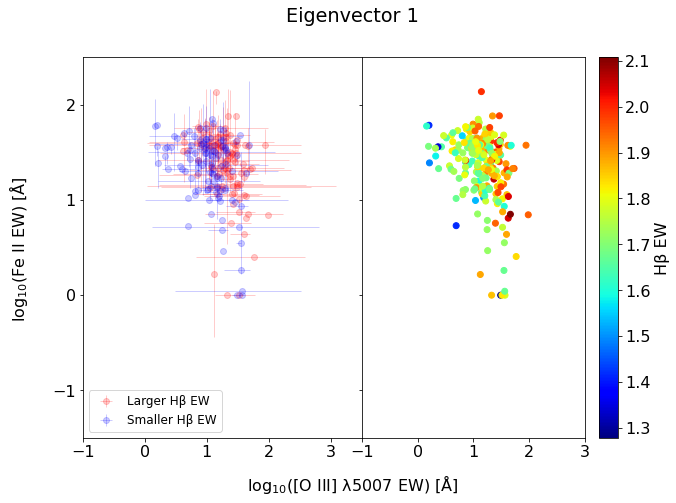

In [17]:
#Calling all of the data
fe2_ew = np.log10(spec_measurements_table['ew_fe2'])
u_fe2ew = np.log10(spec_measurements_table['upp_ew_fe2'])
l_fe2ew = np.log10(spec_measurements_table['low_ew_fe2'])
o3_ew = np.log10(spec_measurements_table['ew_o3'])
u_o3ew = np.log10(spec_measurements_table['upp_ew_o3'])
l_o3ew = np.log10(spec_measurements_table['low_ew_o3'])
idx = np.power(10,o3_ew) > 1.0 #Detectable [O III] cutoff
fe2_ew = fe2_ew[idx]
u_fe2ew = u_fe2ew[idx]
l_fe2ew = l_fe2ew[idx]
o3_ew = o3_ew[idx]
u_o3ew = u_o3ew[idx]
l_o3ew = l_o3ew[idx]
hb_ew = np.log10(spec_measurements_table['ew_hb'])
hb_ew = hb_ew[idx]

o3_ew[o3_ew<0] = 0
u_o3ew[u_o3ew<0] = 0
l_o3ew[l_o3ew<0] = 0
fe2_ew[fe2_ew<0] = 0
u_fe2ew[u_fe2ew<0] = 0
l_fe2ew[l_fe2ew<0] = 0

#Splitting the sample in half based on Hβ EW
big_hb = [o3_ew[hb_ew>np.median(hb_ew)],fe2_ew[hb_ew>np.median(hb_ew)]]
big_err = [u_o3ew[hb_ew>np.median(hb_ew)],l_o3ew[hb_ew>np.median(hb_ew)],u_fe2ew[hb_ew>np.median(hb_ew)],l_fe2ew[hb_ew>np.median(hb_ew)]]
small_hb = [o3_ew[hb_ew<=np.median(hb_ew)],fe2_ew[hb_ew<=np.median(hb_ew)]]
small_err = [u_o3ew[hb_ew<=np.median(hb_ew)],l_o3ew[hb_ew<=np.median(hb_ew)],u_fe2ew[hb_ew<=np.median(hb_ew)],l_fe2ew[hb_ew<=np.median(hb_ew)]]

fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
plt.subplots_adjust(wspace=0, hspace=0)
plt.suptitle("Eigenvector 1")
fig.text(0.5, 0.02, 'log$_{10}$([O III] λ5007 EW) [Å]', ha='center')
fig.text(0.02, 0.5, 'log$_{10}$(Fe II EW) [Å]', va='center', rotation='vertical')
ax1.errorbar(big_hb[0],big_hb[1], xerr=(big_err[1], big_err[0]), yerr=(big_err[3], big_err[2]), label='Larger Hβ EW', lw=1, fmt="o", c='r', alpha=0.2)
ax1.errorbar(small_hb[0],small_hb[1], xerr=(small_err[1], small_err[0]), yerr=(small_err[3], small_err[2]), label='Smaller Hβ EW', lw=1, fmt="o", c='b', alpha=0.2)
ax1.legend(loc='lower left', prop={'size': 12})
ax1.set_xlim([-1,3.5])
ax1.set_xticks([-1,0,1,2,3])
ax1.set_ylim([-1.5,2.5])
ax2.set_yticks([-1,0,1,2])
cm = plt.cm.get_cmap('jet')
plt.scatter(o3_ew,fe2_ew, c=hb_ew, cmap=cm)
cbar = plt.colorbar()
cbar.set_label('Hβ EW')
ax2.set_xlim([-1,3])
ax2.set_xticks([-1,0,1,2,3])
ax2.set_ylim([-1.5,2.5])
plt.show()

Plotting an example spectrum with Hα emission line fits provided in GNIRS-DQS. This demonstrates how the individual quasar csv files can be utilized to explore the spectral properties of a given source:

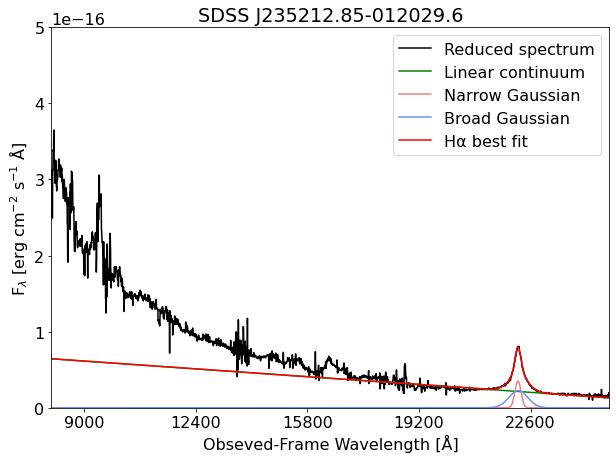

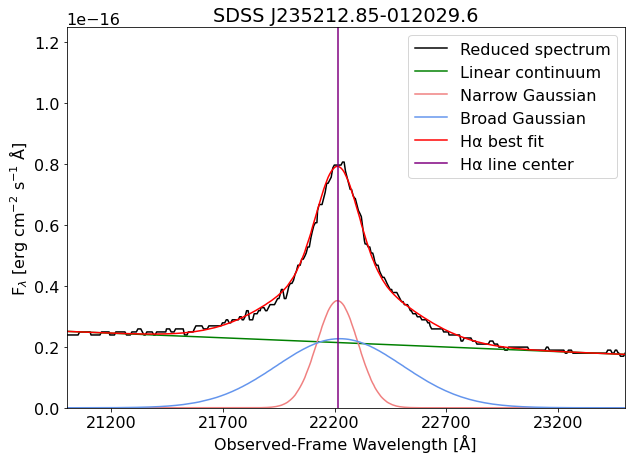

In [18]:
#Calling specific object
data = convert(sc.get(fr = 'gnirs_dqs://235212.85-012029.6.txt',to = ''),'pandas')
idx = spec_measurements_table.obj == "SDSS J235212.85-012029.6"
wl = data.wavelength
fl = data.flux

plt.figure(1)
plt.title("SDSS J235212.85-012029.6")
plt.xlabel("Obseved-Frame Wavelength [Å]")
plt.ylabel("F$_{λ}$ [erg cm$^{-2}$ s$^{-1}$ Å]")
plt.plot(wl,fl,c='k', label='Reduced spectrum')
plt.plot(wl,data.Ha_continuum,c='g', label='Linear continuum')
plt.plot(wl,data.Ha_gauss1,c='lightcoral', label='Narrow Gaussian')
plt.plot(wl,data.Ha_gauss2,c='cornflowerblue', label='Broad Gaussian')
plt.plot(wl,data.Ha_fit,c='r', label='Hα best fit')
plt.legend(loc='upper right')
plt.xlim([8000, 25000])
plt.xticks([9000, 12400, 15800, 19200, 22600])
plt.ylim([0,5e-16])
#Zoomed in view of just the Hα feature
plt.figure(2)
plt.title("SDSS J235212.85-012029.6")
plt.xlabel("Observed-Frame Wavelength [Å]")
plt.ylabel("F$_{λ}$ [erg cm$^{-2}$ s$^{-1}$ Å]")
plt.xlim([21000,23500])
plt.ylim([0,1.25e-16])
plt.plot(wl,fl,c='k', label='Reduced spectrum')
plt.plot(wl,data.Ha_continuum,c='g', label='Linear continuum')
plt.plot(wl,data.Ha_gauss1,c='lightcoral', label='Narrow Gaussian')
plt.plot(wl,data.Ha_gauss2,c='cornflowerblue', label='Broad Gaussian')
plt.plot(wl,data.Ha_fit,c='r', label='Hα best fit')
plt.axvline(float(spec_measurements_table.lc_ha[idx]), c='purple', label='Hα line center')
plt.legend(loc='upper right')
plt.xticks([21200, 21700, 22200, 22700, 23200])
plt.show()

<a class="anchor" id="acks"></a>
# Acknowledgements

* This work is supported by National Science Foundation grants AST-1815281 (B. M. M., C. D., O. S.) and AST-1815645 (M. S. B., A. D. M.). W.N.B. acknowledges support from NSF grant AST-2106990.

* This work was enabled by observations made from the Gemini North telescope, located within the Maunakea Science Reserve and adjacent to the summit of Maunakea. We are grateful for the privilege of observing the Universe from a place that is unique in both its astronomical quality and its cultural significance.

<a class="anchor" id="resources"></a>
# Resources and references

Boroson, T. A. & Green, R. F. 1992, ApJS, 80, 109. "The Emission-Line Properties of Low-Redshift Quasi-stellar Objects":
http://adsabs.harvard.edu/doi/10.1086/191661

Matthews, B. M., Shemmer, O., Dix, C., et al. 2021, ApJS,
252, 15. "Placing High-redshift Quasars in Perspective: A Catalog of Spectroscopic Properties from the Gemini Near Infrared Spectrograph-Distant Quasar Survey": http://adsabs.harvard.edu/doi/10.3847/1538-4365/abc705

GNIRS cross-dispersed data reduction: http://www.gemini.edu/instrumentation/gnirs/data-reduction

Gemini Data Archive: https://archive.gemini.edu/searchform For GNIRS-DQS, search program ID GN-20XXX-LP-16, where XXX spans:
17B, 18A, 18B, 19A, 19B, 20A, 20B